In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)  #creating dataset

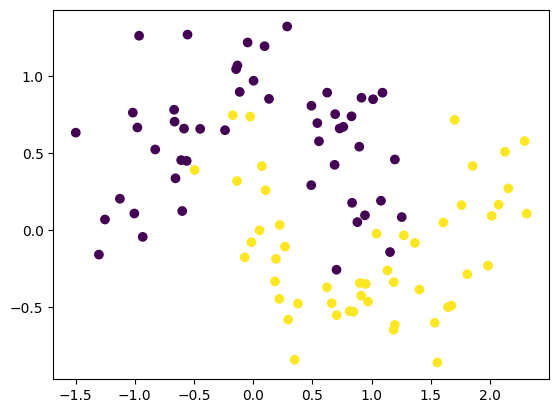

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 14s 1ms/step


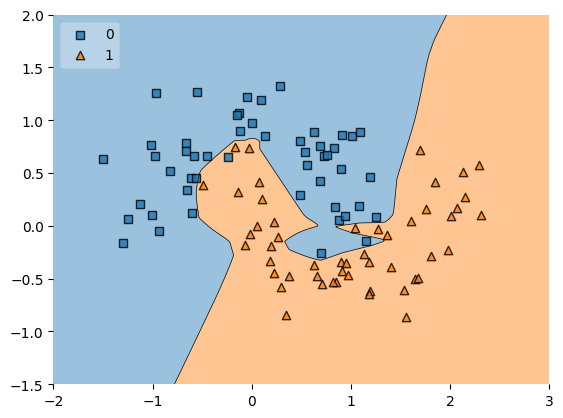

In [6]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()  #we can see that there is overfitting as epochs value is 2000

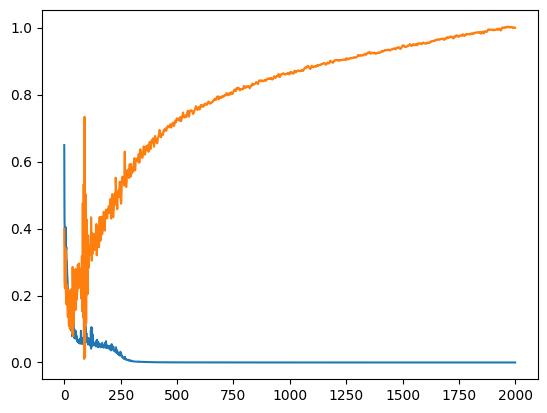

In [7]:
plt.plot(history1.history['loss'])  #here we can see that there is overfitting
plt.plot(history1.history['val_loss'])

# Adding Regularization

In [9]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))  #we can use l1 at the hyperparameter of 0.001
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=1)

Epoch 1/2000
3/3 [==============================] - 1s 110ms/step - loss: 4.1236 - accuracy: 0.5500 - val_loss: 2.7542 - val_accuracy: 0.8500
Epoch 2/2000
3/3 [==============================] - 0s 17ms/step - loss: 2.4085 - accuracy: 0.8250 - val_loss: 1.5437 - val_accuracy: 0.9000
Epoch 3/2000
3/3 [==============================] - 0s 18ms/step - loss: 1.3865 - accuracy: 0.8375 - val_loss: 0.8883 - val_accuracy: 0.9000
Epoch 4/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.8696 - accuracy: 0.8375 - val_loss: 0.5780 - val_accuracy: 0.9000
Epoch 5/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.6704 - accuracy: 0.8125 - val_loss: 0.5197 - val_accuracy: 0.9000
Epoch 6/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.6251 - accuracy: 0.8375 - val_loss: 0.5463 - val_accuracy: 0.9000
Epoch 7/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.6284 - accuracy: 0.8375 - val_loss: 0.5173 - val_accuracy: 0.9000
Epoch 8/2000

9600/9600 [==============================] - 17s 2ms/step


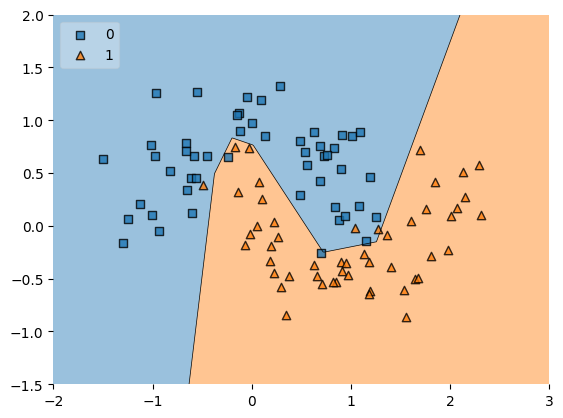

In [11]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

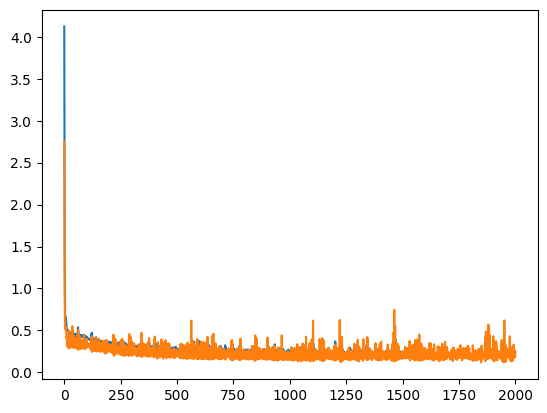

In [12]:
plt.plot(history2.history['loss'])  #here we can see that there is no over fitting
plt.plot(history2.history['val_loss'])

In [13]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)  #as there are 2 inputs and 128 nodes, there are total 256 weights, hence they are reshaped to directly 256
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

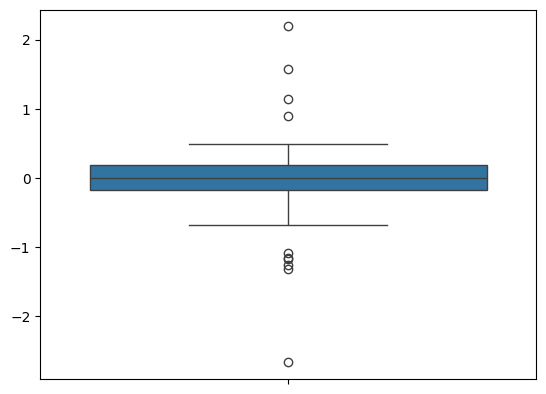

In [14]:
sns.boxplot(model1_weight_layer1)  #this shows the max and min values before applying regularization, which are scattered and have a large difference

<Axes: >

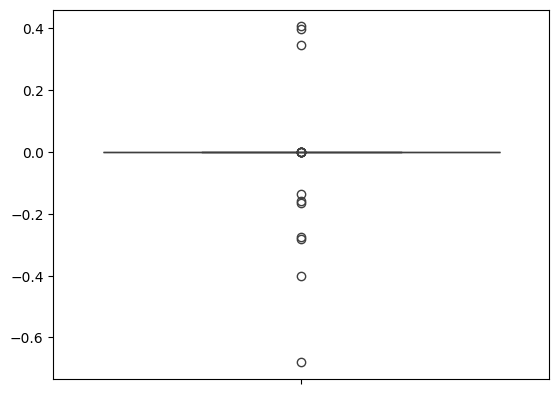

In [15]:
sns.boxplot(model2_weight_layer1)  #now after applying hyperparameter we can see that the range of values are now close to 0 and are in a small range

In [16]:
model1_weight_layer1.max()

2.1909573

In [17]:
model1_weight_layer1.min() #we can see max and min values are having a large range

-2.6746101

In [18]:
model2_weight_layer1.max()

0.4067668

In [20]:
model2_weight_layer1.min()  #we can see max and min values are close to 0

-0.6806975

<ipython-input-21-99b939c7ee98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
<ipython-input-21-99b939c7ee98>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

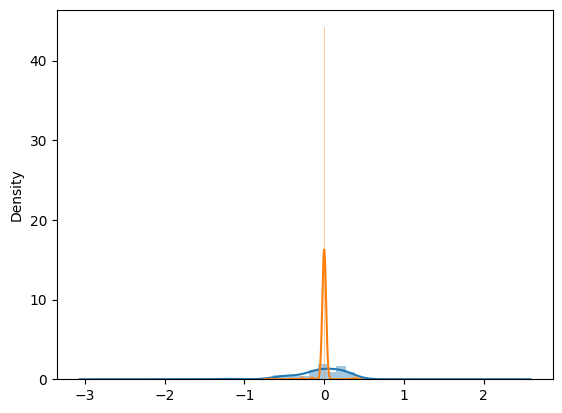

In [21]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)